In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from skimage.io import imshow, imread
from skimage.color import rgb2gray

## Реализация 

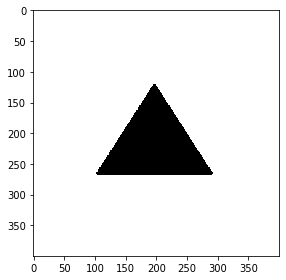

In [ ]:
img = imread('/content/triangle1.png')
img_gray = rgb2gray(img)

img_gray[img_gray < 1] = 0    # Black
img_gray[img_gray == 1] = 1 # White

imshow(img_gray)

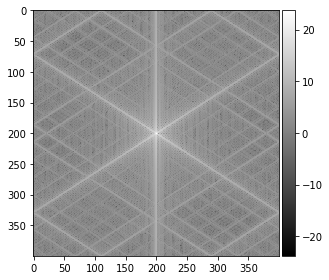

In [ ]:
dp = np.abs(np.fft.fftshift(np.fft.fft2(img_gray)))**2
imshow(np.log(dp), cmap='gray')

In [ ]:
numberOfmasks = 9
radius = 64
center = np.zeros((9, 1), dtype=np.complex128)
center[0, 0] = 0 + 0j
count = 1

theta = 0
while theta <= 7 * (np.pi / 4):
  center[count, 0] = radius * np.exp(1j * theta)
  count = count + 1
  theta += np.pi / 4

x, y = img_gray.shape
mask = np.zeros((x, y, numberOfmasks))
lowRes = np.zeros((x, y, numberOfmasks))
(X, Y) = np.meshgrid(np.linspace(0, x, x), np.linspace(0, y, y))

for i in range(0, numberOfmasks):
  mask[:, :, i] = np.sqrt((X - (x / 2 + np.real(center[i, 0])))**2 + (Y - (y / 2 + np.imag(center[i, 0])))**2) < radius
  lowRes[:, :, i] = np.abs(np.fft.ifft2(np.fft.ifftshift((np.fft.fftshift(np.fft.fft2(img_gray)) * mask[:, :, i]))))

initialSpect = np.fft.fftshift(np.fft.fft2(lowRes[:,:,1]))
initialNew = initialSpect;

c = 0;
while c < 1:  
    for i in range(0, numberOfmasks):
        
        masked = initialNew * mask[:, :, i]
        inverse = np.fft.ifft2(np.fft.ifftshift(masked))
        inverseNew = np.abs(lowRes[:, :, i]) * np.exp(1j * np.angle(inverse))
        newSpectrum = np.fft.fftshift(np.fft.fft2(inverseNew))
        
        for a in range(0, x):
            for b in range(0, y):
                if mask[a, b, i]: 
                    initialNew[a,b] = newSpectrum[a,b]
    c = c + 1
    final = abs(np.fft.ifft2(np.fft.ifftshift(initialNew)))

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


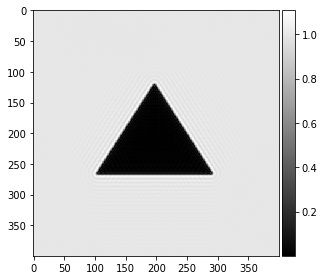

In [ ]:
imshow(lowRes[:, :, 0], cmap='gray')

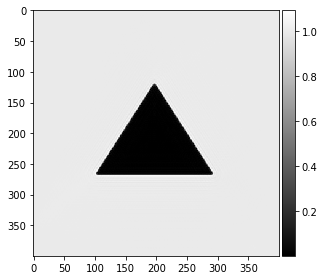

In [ ]:
imshow(final, cmap='gray')

## Дифракционные картинки для каждой маски и снапшот одной маски

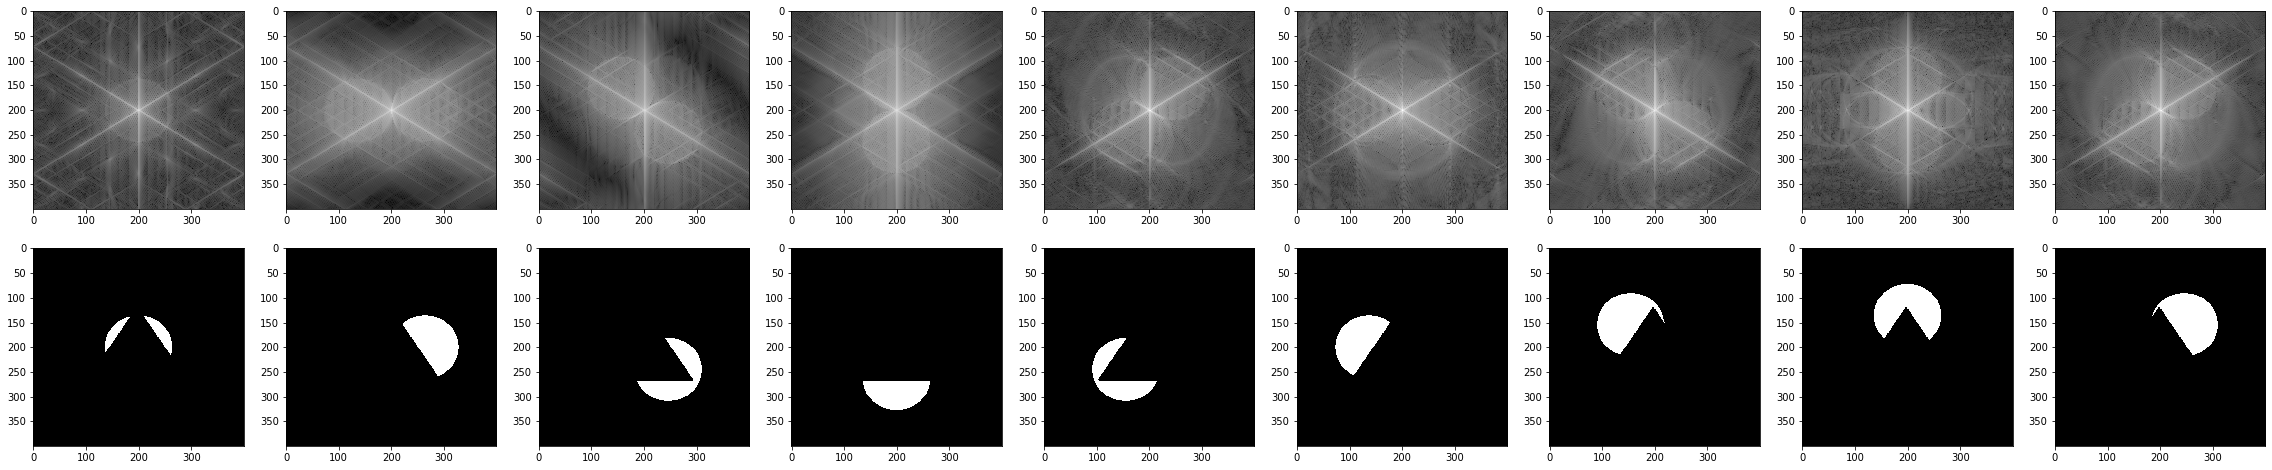

In [ ]:
numberOfmasks = 9
radius = 64
center = np.zeros((9, 1), dtype=np.complex128)
center[0, 0] = 0 + 0j
count = 1

theta = 0
while theta <= 7 * (np.pi / 4):
  center[count, 0] = radius * np.exp(1j * theta)
  count = count + 1
  theta += np.pi / 4

x, y = img_gray.shape
mask = np.zeros((x, y, numberOfmasks))
lowRes = np.zeros((x, y, numberOfmasks))
(X, Y) = np.meshgrid(np.linspace(0, x, x), np.linspace(0, y, y))

fig, ax = plt.subplots(2, 9, figsize=(40, 8))

for i in range(0, numberOfmasks):
  mask[:, :, i] = np.sqrt((X - (x / 2 + np.real(center[i, 0])))**2 + (Y - (y / 2 + np.imag(center[i, 0])))**2) < radius
  lowRes[:, :, i] = np.abs(np.fft.ifft2(np.fft.ifftshift((np.fft.fftshift(np.fft.fft2(img_gray)) * mask[:, :, i]))))

  a = img_gray * mask[:, :, i]
  a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

  ax[0, i].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(lowRes[:, :, i])))**2), cmap='gray', interpolation='nearest', aspect='auto')
  ax[1, i].imshow(np.real(a), cmap='gray', interpolation='nearest', aspect='auto')

initialSpect = np.fft.fftshift(np.fft.fft2(lowRes[:,:,0]))
initialNew = initialSpect;


c = 0;
while c < 1:  
    for i in range(0, numberOfmasks):

        masked = initialNew * mask[:, :, i]
        inverse = np.fft.ifft2(np.fft.ifftshift(masked))
        inverseNew = np.abs(lowRes[:, :, i]) * np.exp(1j * np.angle(inverse))
        newSpectrum = np.fft.fftshift(np.fft.fft2(inverseNew))
        
        for a in range(0, x):
            for b in range(0, y):
                if mask[a, b, i]: 
                    initialNew[a,b] = newSpectrum[a,b]
    c = c + 1
    final = abs(np.fft.ifft2(np.fft.ifftshift(initialNew)))

## Для изображения внутри чёрного квадрата

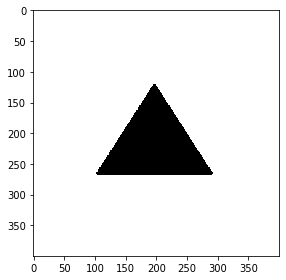

In [ ]:
img_2 = imread('/content/triangle1.png')
img_gray_2 = rgb2gray(img_2)

img_gray_2[img_gray_2 < 1] = 0    # Black
img_gray_2[img_gray_2 == 1] = 1 # White

imshow(img_gray_2)

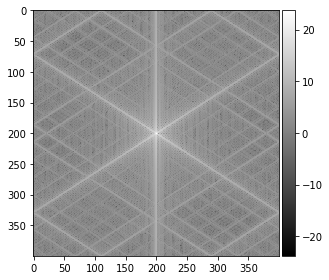

In [ ]:
dp = np.abs(np.fft.fftshift(np.fft.fft2(img_gray_2)))**2
imshow(np.log(dp), cmap='gray')

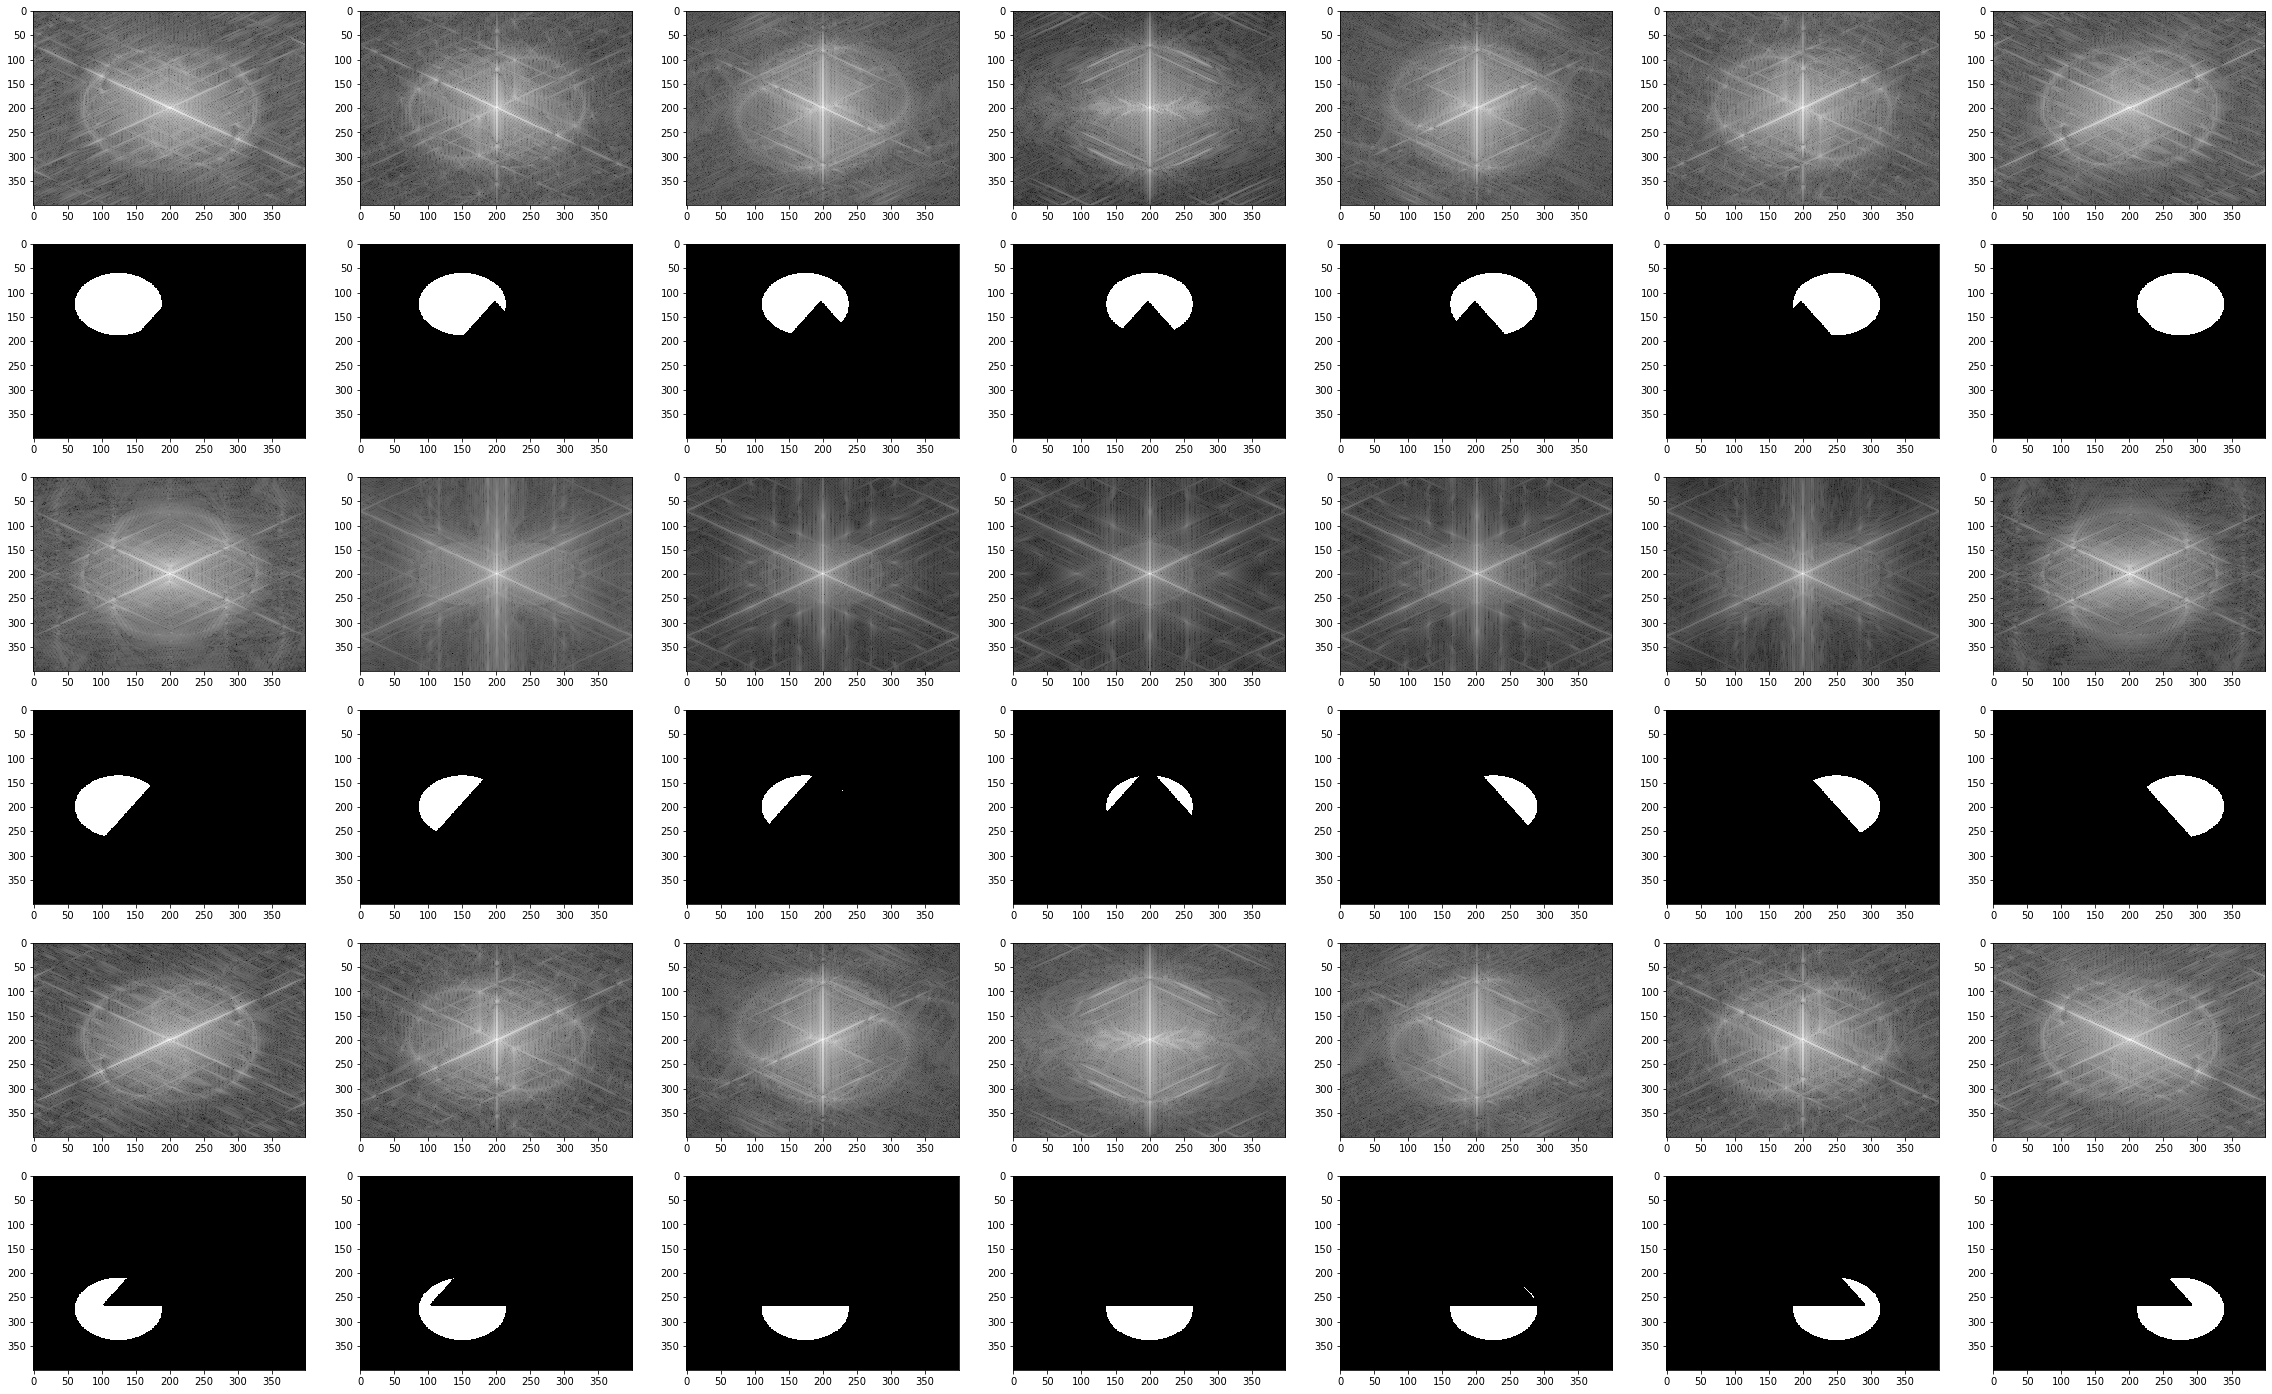

In [ ]:
center = [[125, 125], [150, 125] , [175, 125], [200, 125], [225, 125], [250, 125], [275, 125], 
          [125, 200], [150, 200] , [175, 200], [200, 200], [225, 200], [250, 200], [275, 200],
          [125, 275], [150, 275] , [175, 275], [200, 275], [225, 275], [250, 275], [275, 275]]
numberOfmasks = 21

radius = 64
x, y = img_gray_2.shape
mask = np.zeros((x, y, numberOfmasks))
lowRes = np.zeros((x, y, numberOfmasks))
(X, Y) = np.meshgrid(np.linspace(0, x, x), np.linspace(0, y, y))

fig, ax = plt.subplots(6, 7, figsize=(40, 25))

flag1 = 0
flag2 = 0

for i in range(0, numberOfmasks):
  mask[:, :, i] = np.sqrt((X - (center[i][0]))**2 + (Y - (center[i][1]))**2) < radius
  lowRes[:, :, i] = np.abs(np.fft.ifft2(np.fft.ifftshift((np.fft.fftshift(np.fft.fft2(img_gray_2)) * mask[:, :, i]))))

  a = img_gray_2 * mask[:, :, i]
  a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

  if 7 <= i < 14:
    flag1 = 2
    flag2 = 7
  elif i >= 14:
    flag1 = 4
    flag2 = 14

  ax[0 + flag1, i - flag2].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(lowRes[:, :, i])))**2), cmap='gray', interpolation='nearest', aspect='auto')
  ax[1 + flag1, i - flag2].imshow(np.real(a), cmap='gray', interpolation='nearest', aspect='auto')

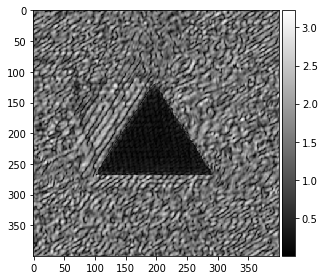

In [ ]:
initialSpect = np.fft.fftshift(np.fft.fft2(lowRes[:,:,0]))
initialNew = initialSpect;

c = 0
while c < 1:  
    for i in range(0, numberOfmasks):

        masked = initialNew * mask[:, :, i]
        inverse = np.fft.ifft2(np.fft.ifftshift(masked))
        inverseNew = np.abs(lowRes[:, :, i]) * np.exp(1j * np.angle(inverse))
        newSpectrum = np.fft.fftshift(np.fft.fft2(inverseNew))
        
        for a in range(0, x):
            for b in range(0, y):
                if mask[a, b, i]: 
                    initialNew[a,b] = newSpectrum[a,b]
    c = c + 1
    final = abs(np.fft.ifft2(np.fft.ifftshift(initialNew)))
imshow(final, cmap='gray')

## С неизвестной фазой

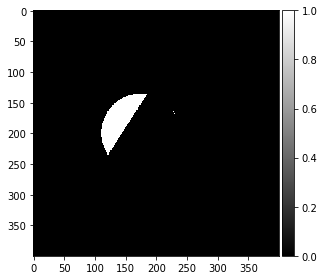

In [ ]:
a = img_gray_2 * mask[:, :, 9]
a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

imshow(np.abs(a), cmap='gray')

In [ ]:
dp = np.abs(np.fft.rfft2(np.abs(a)))**2

In [ ]:
def iterative_loop(dp, N, iterations):
  # creating initial complex-valued field distribution at the detector plane
  img_amplitudes = np.sqrt(dp)
  phase = (2*np.random.rand(N,(N//2)+1) - 1) * np.pi
  field_detector_start = img_amplitudes * np.exp(1j * phase)

  # getting initial object distribution
  object_start = np.fft.irfft2(field_detector_start)
  gk = object_start

  # creating support
  support = np.zeros((N, N))
  R = N / 4
  for i in range(N):
    for j in range(N):
      x = N / 2 - i;
      y = N / 2 - j;
      if ((abs(x) < R) and (abs(y) < R)):
        support[i,j] = 1;
  
  # iterative loop
  treshold = 1
  for a in range(iterations):
    field_detector = np.fft.rfft2(gk)
    field_detector_updated = img_amplitudes * np.exp(1j * np.angle(field_detector))
    gk_updated = np.fft.irfft2(field_detector_updated)
    gk1 = np.zeros((N, N))

    #object constraint
    for i in range(N):
      for j in range(N):
        if gk_updated[i,j] >= 0 and support[i,j] > 0.5:
          gk1[i,j] = gk_updated[i,j]
        else:
          gk1[i,j] = 0; # for white triangle use gk1[i,j] == 0, for black - 1

    #treshold constraint      
    for i in range(N):
      for j in range(N):
        if ((gk1[i,j] > treshold)):
          gk1[i,j] = treshold;

    gk = gk1;

  # getting final image
  imshow(gk)

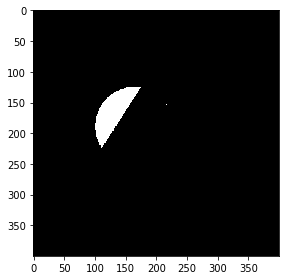

In [ ]:
iterative_loop(dp, 400, 200)

## C известной фазой

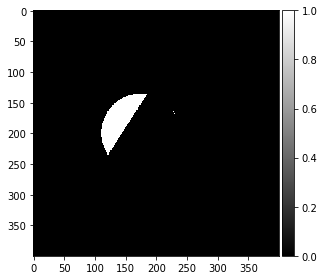

In [ ]:
a = img_gray_2 * mask[:, :, 9]
a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

imshow(np.abs(a), cmap='gray')

In [ ]:
dp = np.abs(np.fft.rfft2(np.abs(a)))**2

In [ ]:
def iterative_loop(dp, N, iterations, a):
  # creating initial complex-valued field distribution at the detector plane
  img_amplitudes = np.sqrt(np.abs(np.fft.rfft2(np.abs(img_gray_2)))**2)
  known_phase = np.angle(np.fft.rfft2(np.abs(a)))
  phase = (2*np.random.rand(N,(N//2)+1) - 1) * np.pi

  field_detector_start = img_amplitudes * np.exp(1j * phase)

  # getting initial object distribution
  object_start = np.fft.irfft2(field_detector_start)
  gk = object_start

  # creating support
  support = np.zeros((N, N))
  R = N / 4
  for i in range(N):
    for j in range(N):
      x = N / 2 - i;
      y = N / 2 - j;
      if ((abs(x) < R) and (abs(y) < R)):
        support[i,j] = 1;
  
  # iterative loop
  treshold = 1
  for a in range(iterations):
    field_detector = np.fft.rfft2(gk)
    field_detector_updated = img_amplitudes * np.exp(1j * known_phase)
    gk_updated = np.fft.irfft2(field_detector_updated)
    gk1 = np.zeros((N, N))

    #object constraint
    for i in range(N):
      for j in range(N):
        if gk_updated[i,j] >= 0 and support[i,j] > 0.5:
          gk1[i,j] = gk_updated[i,j]
        else:
          gk1[i,j] = 0; # for white triangle use gk1[i,j] == 0, for black - 1

    #treshold constraint      
    for i in range(N):
      for j in range(N):
        if ((gk1[i,j] > treshold)):
          gk1[i,j] = treshold;

    gk = gk1;

  # getting final image
  imshow(gk)

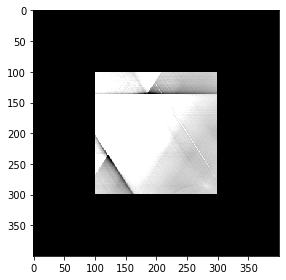

In [ ]:
iterative_loop(dp, 400, 300, a)

## testing

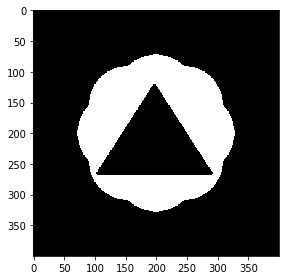

In [ ]:
numberOfmasks = 9
radius = 64
center = np.zeros((9, 1), dtype=np.complex128)
center[0, 0] = 0 + 0j
count = 1

theta = 0
while theta <= 7 * (np.pi / 4):
  center[count, 0] = radius * np.exp(1j * theta)
  count = count + 1
  theta += np.pi / 4

x, y = img_gray.shape
mask = np.zeros((x, y, numberOfmasks))
lowRes = np.zeros((x, y, numberOfmasks))
(X, Y) = np.meshgrid(np.linspace(0, x, x), np.linspace(0, y, y))

final = np.zeros((x, y))
a = np.zeros((x, y, numberOfmasks))

for i in range(0, numberOfmasks):
  mask[:, :, i] = np.sqrt((X - (x / 2 + np.real(center[i, 0])))**2 + (Y - (y / 2 + np.imag(center[i, 0])))**2) < radius
  lowRes[:, :, i] = np.abs(np.fft.ifft2(np.fft.ifftshift((np.fft.fftshift(np.fft.fft2(img_gray)) * mask[:, :, i]))))

  a[:, :, i] = img_gray * mask[:, :, i]
  a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

  for i in range(0, numberOfmasks):
    final += np.abs(a[:, :, i])

final[final < 1] = 0    # Black
final[final >= 1] = 1 # White

imshow(final)

In [ ]:
dp = np.abs(np.fft.rfft2(final))**2

def iterative_loop(dp, N, iterations):
  # creating initial complex-valued field distribution at the detector plane
  img_amplitudes = np.sqrt(dp)
  phase = (2*np.random.rand(N,(N//2)+1) - 1) * np.pi
  field_detector_start = img_amplitudes * np.exp(1j * phase)

  # getting initial object distribution
  object_start = np.fft.irfft2(field_detector_start)
  gk = object_start

  # creating support
  support = np.zeros((N, N))
  R = N / 3
  for i in range(N):
    for j in range(N):
      x = N / 2 - i;
      y = N / 2 - j;
      if ((abs(x) < R) and (abs(y) < R)):
        support[i,j] = 1;
  
  # iterative loop
  treshold = 1
  for i in range(iterations):
    field_detector = np.fft.rfft2(gk)
    field_detector_updated = img_amplitudes * np.exp(1j * np.angle(field_detector))
    gk_updated = np.fft.irfft2(field_detector_updated)
    gk1 = np.zeros((N, N))

    #object constraint
    for i in range(N):
      for j in range(N):
        if gk_updated[i,j] >= 0 and support[i,j] > 0.5:
          gk1[i,j] = gk_updated[i,j]
        else:
          gk1[i,j] = 0; # for white triangle use gk1[i,j] == 0, for black - 1

    #treshold constraint      
    for i in range(N):
      for j in range(N):
        if ((gk1[i,j] > treshold)):
          gk1[i,j] = treshold;

    gk = gk1;

  # getting final image
  imshow(gk)

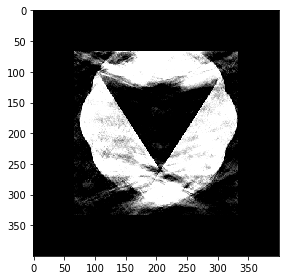

In [ ]:
iterative_loop(dp, 400, 200)

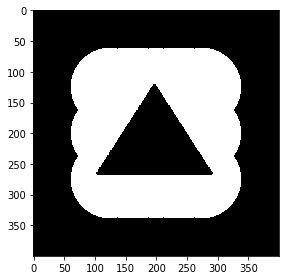

In [ ]:
center = [[125, 125], [150, 125] , [175, 125], [200, 125], [225, 125], [250, 125], [275, 125], 
          [125, 200], [150, 200] , [175, 200], [200, 200], [225, 200], [250, 200], [275, 200],
          [125, 275], [150, 275] , [175, 275], [200, 275], [225, 275], [250, 275], [275, 275]]
numberOfmasks = 21

radius = 64
x, y = img_gray.shape
mask = np.zeros((x, y, numberOfmasks))
lowRes = np.zeros((x, y, numberOfmasks))
(X, Y) = np.meshgrid(np.linspace(0, x, x), np.linspace(0, y, y))

final = np.zeros((x, y))
a = np.zeros((x, y, numberOfmasks))

flag1 = 0
flag2 = 0

for i in range(0, numberOfmasks):
  mask[:, :, i] = np.sqrt((X - (center[i][0]))**2 + (Y - (center[i][1]))**2) < radius
  lowRes[:, :, i] = np.abs(np.fft.ifft2(np.fft.ifftshift((np.fft.fftshift(np.fft.fft2(img_gray)) * mask[:, :, i]))))

  a[:, :, i] = img_gray * mask[:, :, i]
  a = np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(a))))

  if 7 <= i < 14:
    flag1 = 2
    flag2 = 7
  elif i >= 14:
    flag1 = 4
    flag2 = 14

for i in range(0, numberOfmasks):
  final += np.abs(a[:, :, i])

final[final < 1] = 0    # Black
final[final >= 1] = 1 # White

imshow(final)

In [ ]:
dp = np.abs(np.fft.rfft2(final))**2

def iterative_loop(dp, N, iterations):
  # creating initial complex-valued field distribution at the detector plane
  img_amplitudes = np.sqrt(dp)
  phase = (2*np.random.rand(N,(N//2)+1) - 1) * np.pi
  field_detector_start = img_amplitudes * np.exp(1j * phase)

  # getting initial object distribution
  object_start = np.fft.irfft2(field_detector_start)
  gk = object_start

  # creating support
  support = np.zeros((N, N))
  R = N / 3
  for i in range(N):
    for j in range(N):
      x = N / 2 - i;
      y = N / 2 - j;
      if ((abs(x) < R) and (abs(y) < R)):
        support[i,j] = 1;
  
  # iterative loop
  treshold = 1
  for i in range(iterations):
    field_detector = np.fft.rfft2(gk)
    field_detector_updated = img_amplitudes * np.exp(1j * np.angle(field_detector))
    gk_updated = np.fft.irfft2(field_detector_updated)
    gk1 = np.zeros((N, N))

    #object constraint
    for i in range(N):
      for j in range(N):
        if gk_updated[i,j] >= 0 and support[i,j] > 0.5:
          gk1[i,j] = gk_updated[i,j]
        else:
          gk1[i,j] = 0; # for white triangle use gk1[i,j] == 0, for black - 1

    #treshold constraint      
    for i in range(N):
      for j in range(N):
        if ((gk1[i,j] > treshold)):
          gk1[i,j] = treshold;

    gk = gk1;

  # getting final image
  imshow(gk)

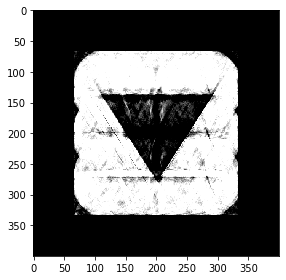

In [ ]:
iterative_loop(dp, 400, 200)